<a href="https://colab.research.google.com/github/raissamiranda/Neural-Network-with-Backpropagation-using-MNIST/blob/main/neuralNetworkBackpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# Neural Networks and Backpropagation: A Comparative Study of Gradient Descent Methods for MNIST Digit Recognition

**Raissa Miranda Maciel**

**2020006965**

</center>

## Introduction

Neural networks are computational models inspired by the functioning of the human brain, capable of learning and generalizing from data. This work focuses on the implementation of a three-layer neural network and the application of the backpropagation algorithm for optimizing the network's weights.

In this project, a neural network will be used for the task of handwritten digit recognition. The dataset used contains 5000 entries, where each entry represents an image of a handwritten digit. Each image is a 28x28 pixel matrix, resulting in a 784-dimensional vector after being flattened. The first column of the data file contains the label of the correct digit, while the other columns represent the pixel values of the image.

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from tabulate import tabulate

## A quick view of the dataset

Below, we provide a glimpse of the dataset to understand its structure and visualize some of the handwritten digit images. This will help in comprehending the input data format and its corresponding labels.


Data Structure: First 5 Rows of the Dataset

   7  0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.658  0.659  0.660  \
0  2  0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0  0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  4  0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  1  0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.661  0.662  0.663  0.664  0.665  0.666  0.667  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 785 columns]


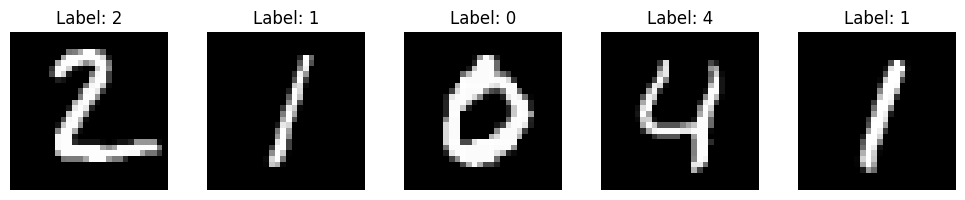

In [2]:
data = pd.read_csv('data_tp1')

# Display the first 5 rows of the dataset to understand its structure
print("\nData Structure: First 5 Rows of the Dataset\n")
print(data.head())

# Function to plot some handwritten digit images
def plot_digits(data, num_images=5):
    fig, axes = plt.subplots(1, num_images, figsize=(10, 2))
    for i in range(num_images):
        label = data.iloc[i, 0]
        image = data.iloc[i, 1:].values.reshape(28, 28)
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'Label: {label}')
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Plot the first 5 images from the dataset
plot_digits(data, num_images=5)

## Preparing Data

In this section, we will prepare the data for training our neural network. Here is an explanation of how data is structured and fed into the model.

- **Tensors**:
  Tensors are multi-dimensional arrays used in PyTorch, similar to NumPy arrays, but with support for GPU acceleration. They are used to represent the input data (pixel values of images) and the target labels (digit labels).

- **TensorDataset**:
  TensorDataset is a utility that pairs input data and labels into a single dataset object. This ensures each sample is correctly associated with its label, making it easier to handle the data.

- **DataLoader**:
  DataLoader loads data efficiently during training. It handles batching (splitting data into smaller, manageable batches), shuffling (randomly rearranging data to prevent learning unintended patterns), and parallel loading (using multiple threads to speed up data loading).

In [3]:
# The first column contains the labels, and the other columns contain the pixel values of the image
X = data.iloc[:, 1:].values / 255.0    # X is a Numpy array that contains the normalized pixel values of an image
y = data.iloc[:, 0].values             # y is a Numpy array that contains the digit labels, indicating the actual digit value

# Converting the labels to Long tensor
y = torch.tensor(y, dtype=torch.long)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Converting the data to tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Creating DataLoader for training and testing
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

# Shuffles the data at each epoch, ensuring the model does not see the data in the
# same order every time,which helps prevent overfitting and improves generalization
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

<ipython-input-3-7e8b727e7f74>:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long)
<ipython-input-3-7e8b727e7f74>:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_test = torch.tensor(y_test, dtype=torch.long)


##### Example of functionality


Example of functionality:
Training Dataset Size: 3999
Test Dataset Size: 1000

Sample 0 from Training Dataset:
Features (first 100 pixels): tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Label: 0


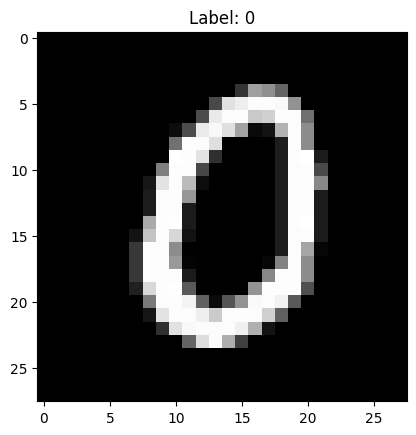

In [4]:
print("\nExample of functionality:")

# Display the size of the datasets
print(f"Training Dataset Size: {len(train_dataset)}")
print(f"Test Dataset Size: {len(test_dataset)}")

# Display a sample from the training dataset
sample_idx = 0  # Sample index
sample_features, sample_label = train_dataset[sample_idx]

print(f"\nSample {sample_idx} from Training Dataset:")
print(f"Features (first 100 pixels): {sample_features[:10]}")
print(f"Label: {sample_label}")

# Visualize the image corresponding to the sample
sample_image = sample_features.numpy().reshape(28, 28)
plt.imshow(sample_image, cmap='gray')
plt.title(f'Label: {sample_label}')
plt.show()

## Initializing weights

The following code is used to initialize the weights and biases of the neural network. The initialize_weights function initializes the weights (W1 and W2) and biases (b1 and b2) for the hidden and output layers of the neural network.

In [5]:
# Inicializando os pesos e biases
def initialize_weights(input_size, hidden_size, output_size):
    W1 = torch.randn(hidden_size, input_size) * 0.01  # Pesos da camada oculta
    b1 = torch.zeros(hidden_size)  # Biases da camada oculta
    W2 = torch.randn(output_size, hidden_size) * 0.01  # Pesos da camada de saída
    b2 = torch.zeros(output_size)  # Biases da camada de saída
    return W1, b1, W2, b2

##### Example of functionality

In [6]:
input_size = 784
hidden_size = 50
output_size = 10
W1, b1, W2, b2 = initialize_weights(input_size, hidden_size, output_size)

# Example of the initialized weights and biases
print("="*50)
print("Dimensions of Initialized Weights and Biases")
print("="*50)
print(f"W1 (Weights of the Hidden Layer): {W1.shape}")
print(f"b1 (Biases of the Hidden Layer): {b1.shape}")
print(f"W2 (Weights of the Output Layer): {W2.shape}")
print(f"b2 (Biases of the Output Layer): {b2.shape}")

# Displaying some values to check the initialization
print("\n" + "="*50)
print("Some Values of Initialized Weights and Biases")
print("="*50)
print("W1 (Weights of the Hidden Layer - first 2 neurons):")
print(W1[:2])
print("\nb1 (Biases of the Hidden Layer - first 2 neurons):")
print(b1[:2])
print("\nW2 (Weights of the Output Layer - first 2 neurons):")
print(W2[:2])
print("\nb2 (Biases of the Output Layer - first 2 neurons):")
print(b2[:2])

Dimensions of Initialized Weights and Biases
W1 (Weights of the Hidden Layer): torch.Size([50, 784])
b1 (Biases of the Hidden Layer): torch.Size([50])
W2 (Weights of the Output Layer): torch.Size([10, 50])
b2 (Biases of the Output Layer): torch.Size([10])

Some Values of Initialized Weights and Biases
W1 (Weights of the Hidden Layer - first 2 neurons):
tensor([[ 0.0044, -0.0230, -0.0026,  ...,  0.0171, -0.0032,  0.0108],
        [-0.0231, -0.0075, -0.0037,  ...,  0.0090, -0.0009, -0.0007]])

b1 (Biases of the Hidden Layer - first 2 neurons):
tensor([0., 0.])

W2 (Weights of the Output Layer - first 2 neurons):
tensor([[ 8.5852e-03, -3.7422e-03,  8.1510e-03,  5.5611e-03,  1.3547e-02,
          5.5365e-03, -1.4041e-02, -2.0317e-03,  3.8968e-03, -1.5104e-04,
          9.0280e-03, -1.0144e-02, -1.2578e-02, -1.0276e-02,  1.4583e-02,
          1.6111e-02, -1.2394e-02, -2.7581e-04,  4.9149e-03, -4.8136e-04,
         -1.4652e-02, -1.2389e-02,  8.4592e-03,  5.6923e-03, -1.1401e-02,
         -1.

## Forward Propagation

Forward propagation is the process by which the input data is passed through the neural network to generate an output. In this step, each layer of the network performs a linear transformation followed by a non-linear activation function. The purpose of forward propagation is to compute the predicted output of the network given the input data.


In [7]:
def forward(X, W1, b1, W2, b2):
    Z1 = torch.matmul(X, W1.T) + b1      # Calculate the input to the hidden layer
    A1 = torch.sigmoid(Z1)               # Apply the sigmoid activation function
    Z2 = torch.matmul(A1, W2.T) + b2     # Calculate the input to the output layer
    return Z1, A1, Z2

## Backward propagation

Backward propagation is the process by which the neural network adjusts its weights and biases based on the error in the predicted output. It involves calculating the gradient of the loss function with respect to each weight by applying the chain rule, propagating the error backward through the network. This step is crucial for the optimization process, as it provides the necessary information for updating the weights to minimize the error.

In this project, we use the backward() function from the PyTorch library to perform backpropagation. The loss.backward() function computes the gradient of the loss with respect to all tensors with requires_grad=True. These gradients are then used by the optimizer to update the model parameters, reducing the loss function iteratively.

## Validation

The following code defines a function to calculate the accuracy of the neural network's predictions. Accuracy is a metric that measures the proportion of correct predictions out of the total number of predictions. The calculate_accuracy function compares the predicted labels with the true labels and computes the ratio of correctly predicted labels to the total number of labels.

In [8]:
def calculate_accuracy(output, labels):
    _, predicted = torch.max(output, 1)           # Gets the index of the maximum log-probability
    correct = (predicted == labels).sum().item()  # Counts the number of correct predictions
    accuracy = correct / (labels.size(0))         # Computes the accuracy as a ratio of correct predictions
    return accuracy


The following code defines a function for validating the neural network's performance on a validation dataset. The validate function computes the loss and accuracy of the model on unseen validation data. It performs a forward pass on the validation data, calculates the loss using the loss function shown below, and evaluates the accuracy of the model's predictions.

\begin{equation}
J(\Theta) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log \left( \hat{p}_k^{(i)} \right)
\end{equation}

In [9]:
def validate(val_loader, weights1, bias1, weights2, bias2, input_dim, loss_function):
    loss = 0  # Initialize total test loss
    correct_res = 0  # Initialize total test correct results
    with torch.no_grad():  # Disable gradient calculation
        for val_images, val_labels in val_loader:
            val_images = val_images.view(-1, input_dim)  # Flatten validation images
            val_labels = val_labels.view(-1)  # Ensure validation labels are in the correct shape
            _, _, val_output = forward(val_images, weights1, bias1, weights2, bias2)  # Forward pass
            val_loss = loss_function(val_output, val_labels.view(-1))  # Calculate validation loss
            loss += val_loss.item()  # Accumulate validation loss
            correct_res += calculate_accuracy(val_output, val_labels)  # Accumulate correct results

    val_accuracy = correct_res / len(val_loader.dataset)  # Calculate validation accuracy
    val_loss = loss / len(val_loader)  # Calculate average validation loss
    return val_loss, val_accuracy  # Return validation loss and accuracy

##  Neural Networking Training

In this section, we explore different gradient descent methods to optimize the neural network during training. These methods include Stochastic Gradient Descent (SGD) and Mini-Batch Gradient Descent.

* **Stochastic Gradient Descent (SGD):**

SGD updates the model parameters using one sample at a time. It calculates the loss and gradient for each sample, then updates the weights accordingly. This process is repeated for each sample in the dataset, making it computationally efficient but noisy due to high variance in updates.



* **Mini-Batch Gradient Descent:**

Mini-Batch Gradient Descent splits the dataset into small batches and performs updates based on these batches. For each batch, the forward pass, loss calculation, and backward pass are performed, followed by weight updates. This method balances the efficiency of SGD and the stability of Full-Batch Gradient Descent by reducing variance and allowing for parallel computations.

In [10]:
def train(model_type, val_loader, train_loader, input_dim, hidden_dim, output_dim, lr, epochs, batch_size=None):
    # Initialize weights and biases
    weights1, bias1, weights2, bias2 = initialize_weights(input_dim, hidden_dim, output_dim)
    weights1 = weights1.clone().detach().requires_grad_(True)
    bias1 = bias1.clone().detach().requires_grad_(True)
    weights2 = weights2.clone().detach().requires_grad_(True)
    bias2 = bias2.clone().detach().requires_grad_(True)

    # Initialize optimizer and loss function
    optimizer = optim.SGD([weights1, bias1, weights2, bias2], lr=lr)
    loss_function = torch.nn.CrossEntropyLoss()

    # Loss and accuracy history
    train_loss_metrics, train_accuracy_metrics, validation_loss_metrics, validation_accuracy_metrics = ([] for _ in range(4))

    for epoch in range(epochs):
        total_train_loss = 0
        total_train_correct = 0

        if model_type == 'SGD':
            for images, labels in train_loader:
                labels = labels.long() if labels.dtype != torch.long else labels  # Convert labels to long if necessary
                images = images.view(-1, input_dim)                               # Flatten images to match input dimensions
                optimizer.zero_grad()                                             # Zero the gradients
                _, _, output = forward(images, weights1, bias1, weights2, bias2)  # Perform forward pass
                loss = loss_function(output, labels.view(-1))                     # Compute the loss
                total_train_loss += loss.item()                                   # Accumulate the loss
                loss.backward()                                                   # Perform backward pass
                optimizer.step()                                                  # Update the weights
                total_train_correct += calculate_accuracy(output, labels)         # Compute and accumulate accuracy


        elif model_type == 'Mini_Batch':
            dataset_size = len(train_loader.dataset)                              # Get the size of the dataset
            for i in range(0, dataset_size, batch_size):
                batch_images, batch_labels = zip(*[train_loader.dataset[j] for j in range(i, min(i + batch_size, dataset_size))])  # Create mini-batches
                batch_images = torch.stack(batch_images).view(-1, input_dim)      # Stack and flatten batch images
                batch_labels = torch.tensor(batch_labels).long()                  # Convert batch labels to long tensor
                optimizer.zero_grad()                                             # Zero the gradients
                _, _, output = forward(batch_images, weights1, bias1, weights2, bias2)  # Perform forward pass
                loss = loss_function(output, batch_labels.view(-1))               # Compute the loss
                total_train_loss += loss.item()                                   # Accumulate the loss
                loss.backward()                                                   # Perform backward pass
                optimizer.step()                                                  # Update the weights
                total_train_correct += calculate_accuracy(output, batch_labels)   # Compute and accumulate accuracy


        train_accuracy = total_train_correct / len(train_loader.dataset)          # Compute training accuracy
        train_loss_metrics.append(total_train_loss / len(train_loader))
        train_accuracy_metrics.append(train_accuracy)

        # Validate the model
        val_loss, val_accuracy = validate(val_loader, weights1, bias1, weights2, bias2, input_dim, loss_function)
        validation_loss_metrics.append(val_loss)
        validation_accuracy_metrics.append(val_accuracy)


    return weights1, bias1, weights2, bias2, train_loss_metrics, train_accuracy_metrics, validation_loss_metrics, validation_accuracy_metrics

## Auxiliary Plot Functions

In [11]:
def plot_training_results(epochs, train_loss_history, val_loss_history, train_accuracy_history, val_accuracy_history, hidden_layers, gradient_type, metric_type):
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle(f'Training Results using {gradient_type}', fontsize=16, fontweight='bold')

    fig.patch.set_facecolor('#f2f2f2')

    # First row: Loss graphs
    for i, hidden in enumerate(hidden_layers):
        axs[0, i].plot(range(epochs), train_loss_history[hidden], label='Train Loss', color='magenta')
        axs[0, i].plot(range(epochs), val_loss_history[hidden], label='Val Loss', color='purple')
        axs[0, i].set_title(f'Loss with {hidden} {metric_type}', fontsize=12, fontweight='bold')
        axs[0, i].set_xlabel('Epochs', fontsize=10)
        axs[0, i].set_ylabel('Loss', fontsize=10)
        axs[0, i].legend()
        axs[0, i].grid(True)
        axs[0, i].set_facecolor('#e6e6e6')

    # Second row: Accuracy graphs
    for i, hidden in enumerate(hidden_layers):
        axs[1, i].plot(range(epochs), train_accuracy_history[hidden], label='Train Accuracy', color='cyan')
        axs[1, i].plot(range(epochs), val_accuracy_history[hidden], label='Val Accuracy', color='blue')
        axs[1, i].set_title(f'Accuracy with {hidden} {metric_type}', fontsize=12, fontweight='bold')
        axs[1, i].set_xlabel('Epochs', fontsize=10)
        axs[1, i].set_ylabel('Accuracy', fontsize=10)
        axs[1, i].legend()
        axs[1, i].grid(True)
        axs[1, i].set_facecolor('#e6e6e6')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


## Comparative Analysis

We will test the neural network's performance under different configurations by varying the number of hidden layers and the learning rate.

#### Setup configuration

In [12]:
# Initial Configuration of Variables
hidden_layers_list = [25, 50, 100]  # Different configurations for hidden layers to be tested
learning_rates = [1, 5, 10]         # Different learning rates to be tested
epochs = 50                         # Number of epochs for training
lr = 0.01                           # Default learning rate
batch_size = 64                     # Batch size for mini-batch gradient descent
input_dim = 784                     # Input dimension (28x28 pixels for MNIST)
output_dim = 10                     # Output dimension (10 classes for MNIST digits)

### SGD

#### Varying the Number of Hidden Layers

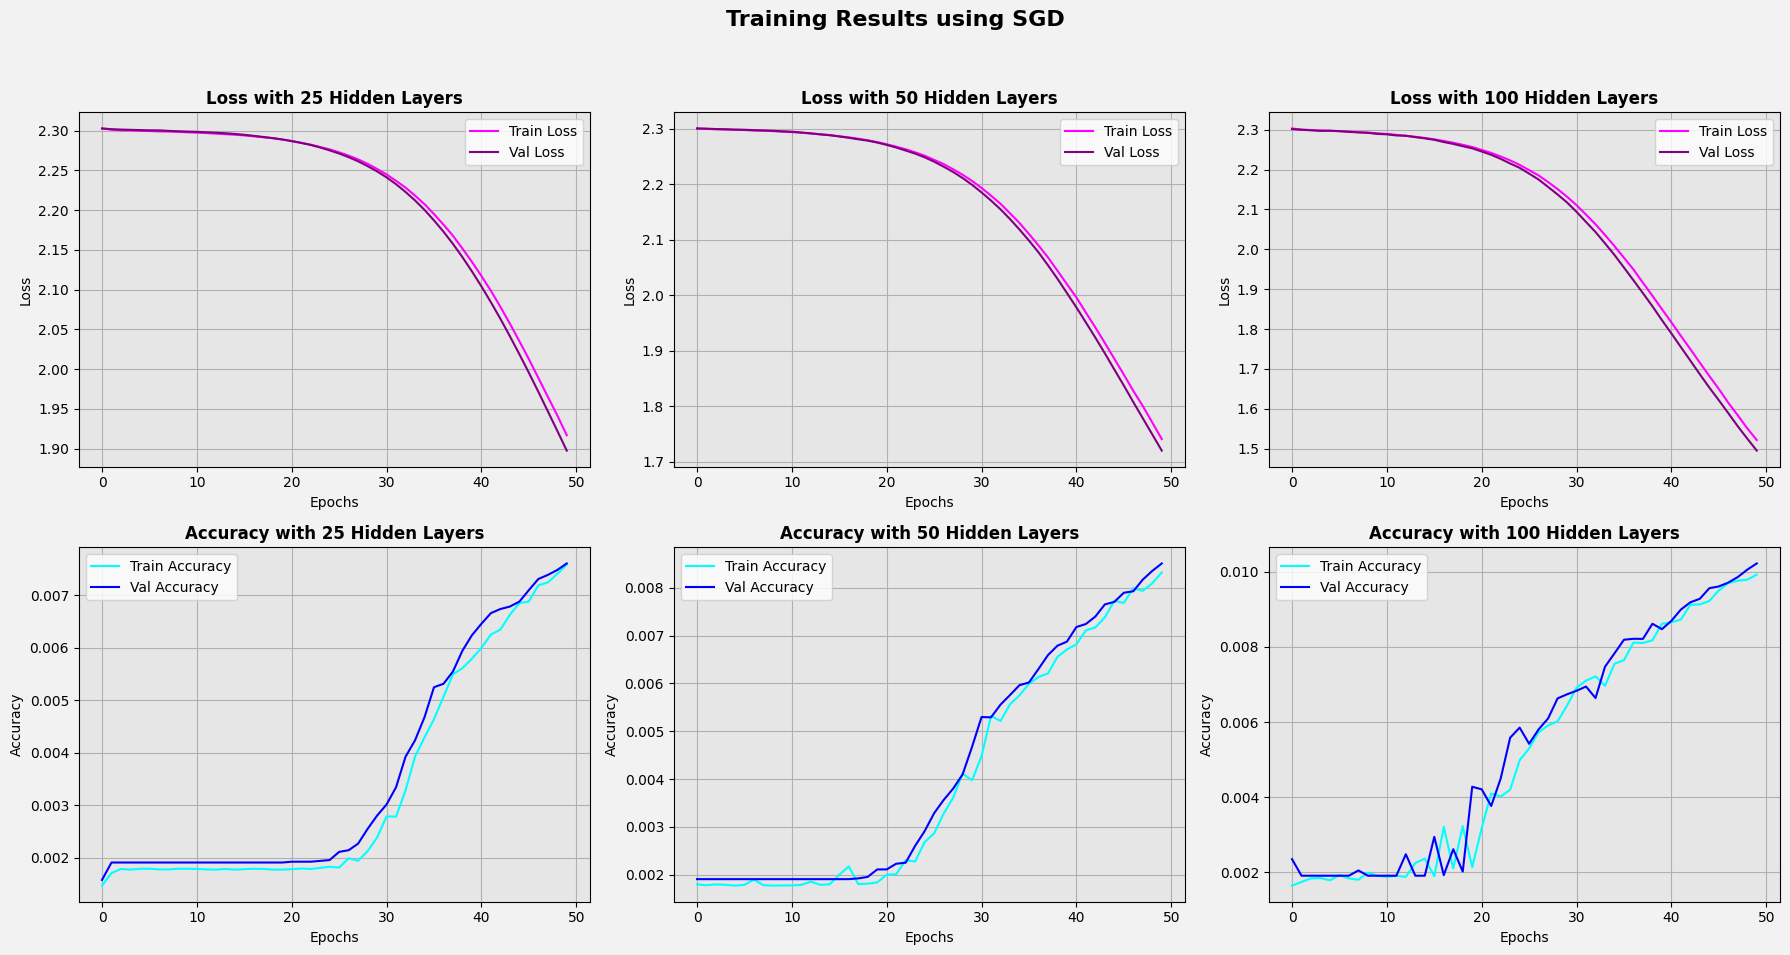

In [13]:
training_loss_list = {}
validation_loss_list = {}
train_accuracy_list = {}
validation_accuracy_list = {}

for hidden_layers in hidden_layers_list:
    _, _, _, _, train_loss, train_accuracy, val_loss, val_accuracy = train(
        'SGD', test_loader, train_loader, input_dim, hidden_layers, output_dim, lr, epochs, batch_size
    )
    training_loss_list[hidden_layers] = train_loss
    validation_loss_list[hidden_layers] = val_loss
    train_accuracy_list[hidden_layers] = train_accuracy
    validation_accuracy_list[hidden_layers] = val_accuracy

plot_training_results(epochs, training_loss_list, validation_loss_list, train_accuracy_list, validation_accuracy_list, hidden_layers_list, 'SGD', 'Hidden Layers')


#### Varying the Learning Rate

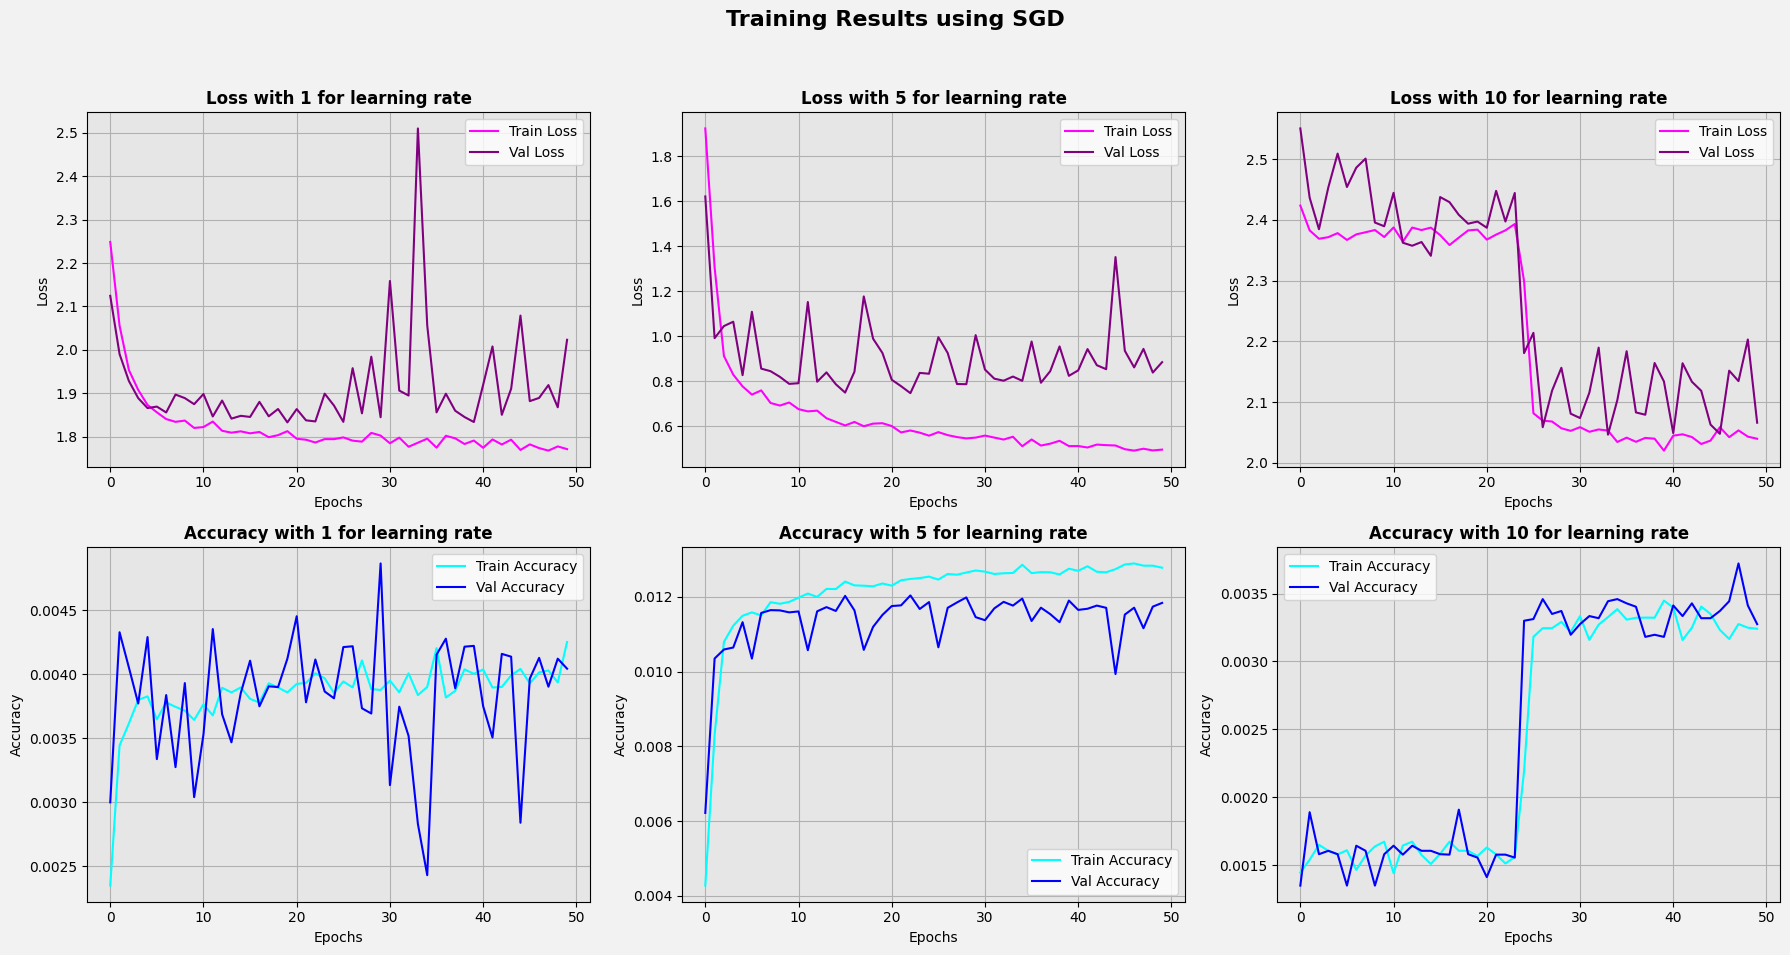

In [14]:
training_loss_list = {}
validation_loss_list = {}
train_accuracy_list = {}
validation_accuracy_list = {}

for lr in learning_rates:
    _, _, _, _, train_loss, train_accuracy, val_loss, val_accuracy = train(
        'SGD', test_loader, train_loader, input_dim, lr, output_dim, lr, epochs, batch_size
    )
    training_loss_list[lr] = train_loss
    validation_loss_list[lr] = val_loss
    train_accuracy_list[lr] = train_accuracy
    validation_accuracy_list[lr] = val_accuracy

plot_training_results(epochs, training_loss_list, validation_loss_list, train_accuracy_list, validation_accuracy_list, learning_rates, 'SGD', 'for learning rate')

### Mini-Batch

#### Varying the Number of Hidden Layers

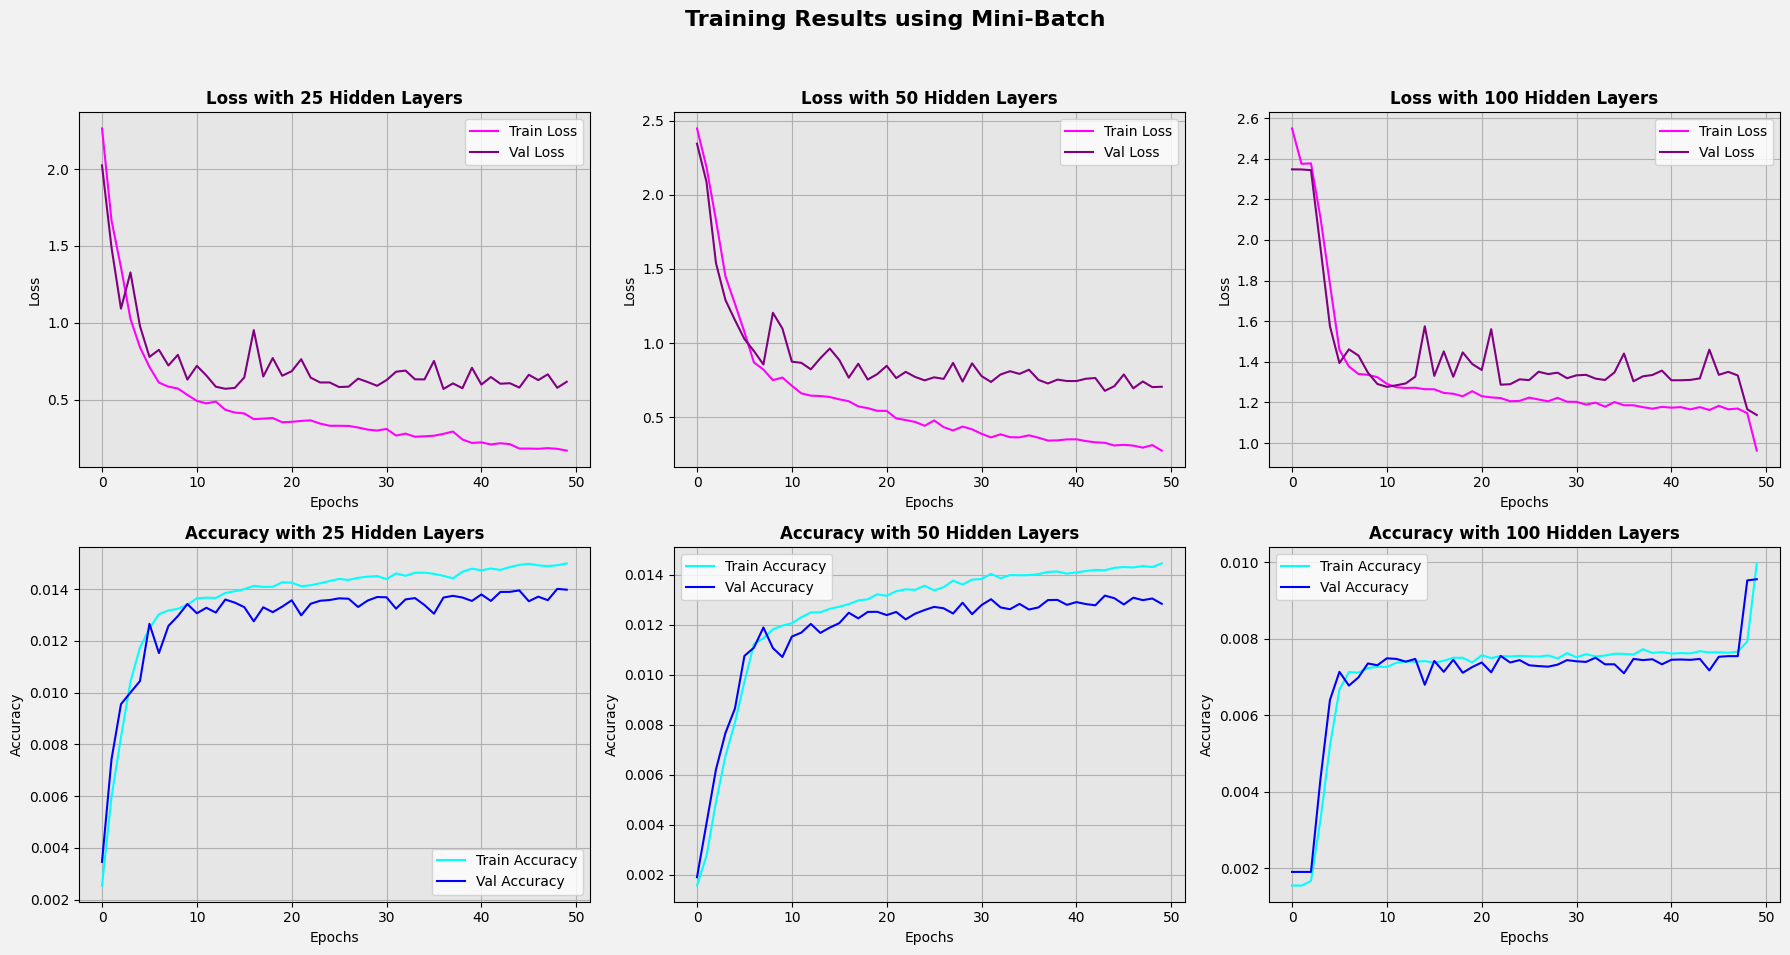

In [15]:
train_loss_list = {}
val_loss_list = {}
train_accuracy_list = {}
val_accuracy_list = {}

for hidden_layers in hidden_layers_list:
    _, _, _, _, train_loss, train_accuracy, val_loss, val_accuracy = train(
        'Mini_Batch', test_loader, train_loader, input_dim, hidden_layers, output_dim, lr, epochs, batch_size
    )
    train_loss_list[hidden_layers] = train_loss
    val_loss_list[hidden_layers] = val_loss
    train_accuracy_list[hidden_layers] = train_accuracy
    val_accuracy_list[hidden_layers] = val_accuracy

plot_training_results(epochs, train_loss_list, val_loss_list, train_accuracy_list, val_accuracy_list, hidden_layers_list, 'Mini-Batch', 'Hidden Layers')

#### Varying the Learning Rate

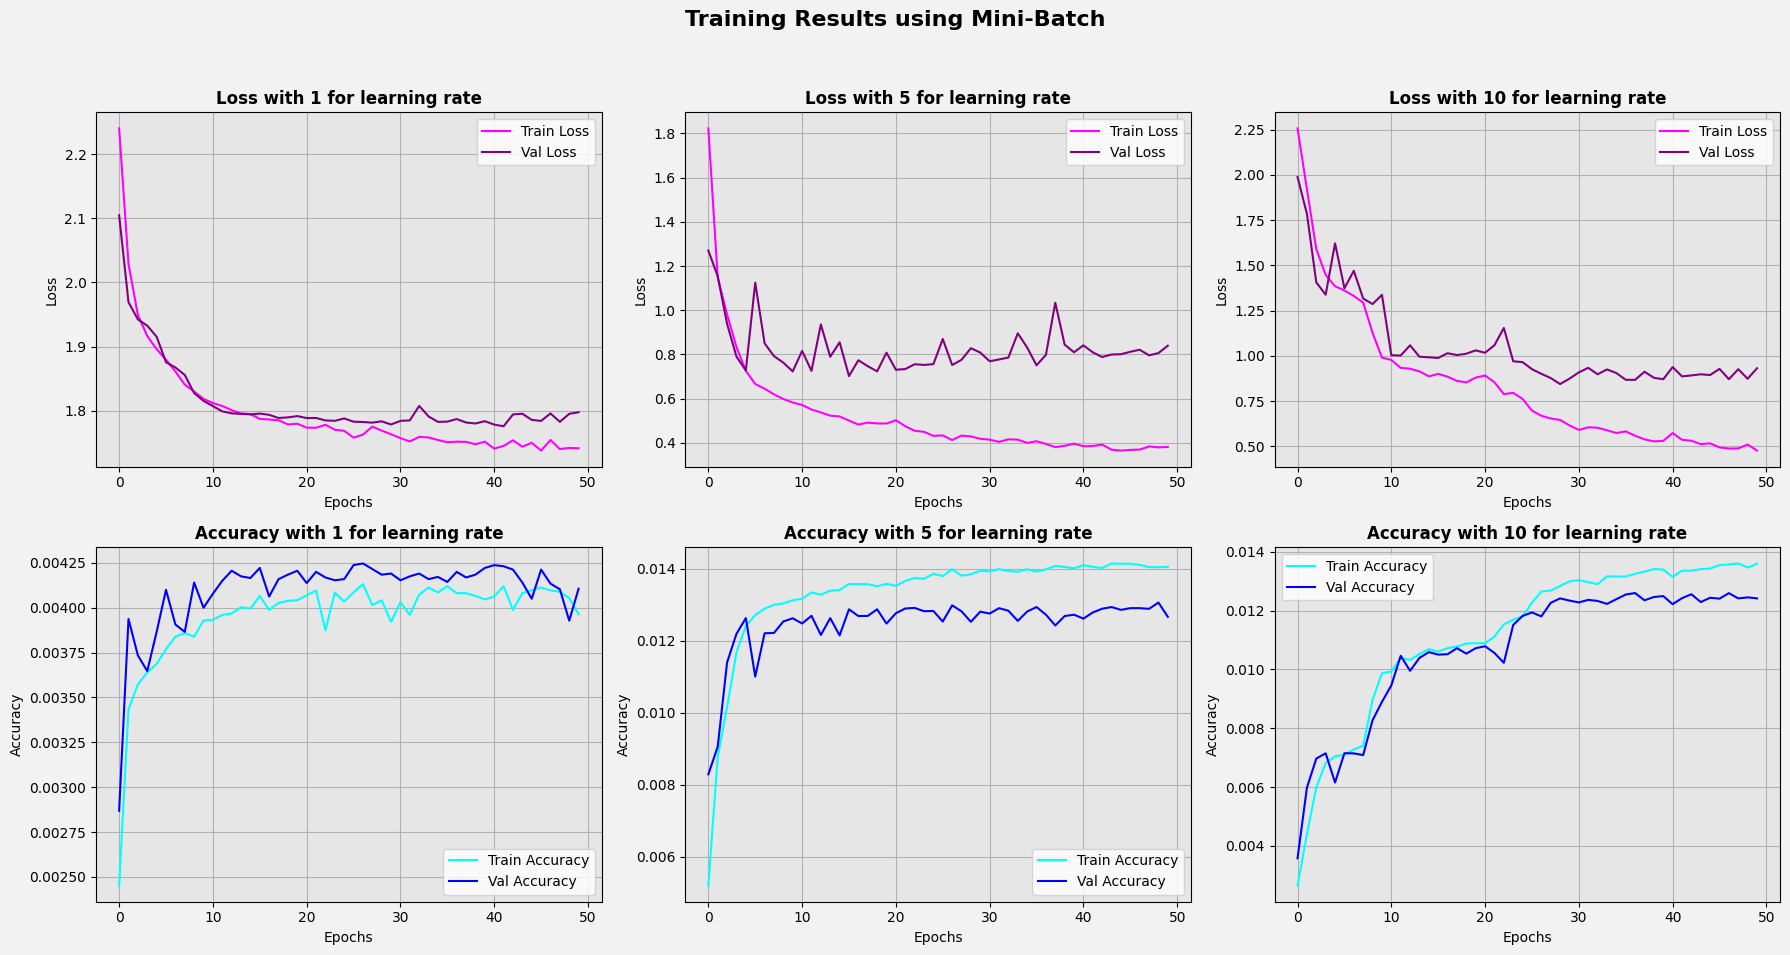

In [16]:
learning_rates = [1, 5, 10]

train_loss_list = {}
val_loss_list = {}
train_accuracy_list = {}
val_accuracy_list = {}

for lr in learning_rates:
    _, _, _, _, train_loss, train_accuracy, val_loss, val_accuracy = train(
        'Mini_Batch', test_loader, train_loader, input_dim, lr, output_dim, lr, epochs, batch_size
    )
    train_loss_list[lr] = train_loss
    val_loss_list[lr] = val_loss
    train_accuracy_list[lr] = train_accuracy
    val_accuracy_list[lr] = val_accuracy

plot_training_results(epochs, train_loss_list, val_loss_list, train_accuracy_list, val_accuracy_list, learning_rates, 'Mini-Batch', 'for learning rate')

## Conclusões

### About the algorithms

> Stochastic Gradient Descent (SGD)

Stochastic Gradient Descent (SGD) is an optimization method commonly used in training neural networks. It updates the model parameters after each training example, which can lead to faster iterations compared to batch gradient descent. However, the frequent updates introduce noise, causing the objective function to fluctuate rather than smoothly converge. Despite this, the noise can help escape local minimus, potentially finding better solutions. SGD is particularly effective for large-scale datasets and online learning, but its convergence can be unstable and requires careful tuning of the learning rate.

> Mini-Batch Gradient Descent

Mini-Batch Gradient Descent strikes a balance between batch gradient descent and SGD. It updates the model parameters after processing a small, randomly selected subset of the training data, called a mini-batch. This approach reduces the variance in parameter updates, leading to more stable convergence compared to SGD. Mini-batch gradient descent leverages the computational efficiency of matrix operations and the parallelism offered by modern hardware like GPUs. It is widely used in practice due to its effectiveness in balancing the speed of convergence and computational efficiency, making it suitable for large-scale datasets.


### About the layers number

By increasing the number of hidden layers in a neural network, we enhance the network's ability to learn complex patterns. With more hidden layers, the network can model more complicated functions and capture nuances in the input data, potentially leading to better performance in classification tasks.

However, increasing the number of layers also increases the risk of overfitting. This occurs because the network becomes too specific to the training set, losing its ability to generalize well to new data.

More hidden layers mean more parameters to be trained, which results in an increased computational load and training time.

For all tee algorithms, increasing the number of hidden layers from 25 to 100 improves the network's learning capacity. This is evidenced by the faster reduction in the loss function and the more consistent increase in accuracy.

Error convergence is faster for networks with more hidden layers, but it's important to note that it also increases the risk of overfitting.

### About the learning rate

The learning rate is a crucial hyperparameter that determines the size of steps taken towards the minimum of the loss function. Lower learning rates (like 1) result in a smoother and more gradual convergence, while higher learning rates (like 10) can cause oscillations in the loss function, making training stability more difficult.

The Mini-Batch seems to be more stable with higher learning rates compared to SGD. This is because Mini-Batch makes more frequent and less drastic updates, balancing the precision of Gradient Descent and the speed of SGD.

For very high learning rates, all algorithms showed instability, evidenced by fluctuations in the loss function and accuracy.